In [2]:
#Goal: predict if a company goes bankrupt or not
#Since 96 features, use dimensionality reduction techniques (eg. PCA) or feature selection to improve performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import tree

In [3]:
df = pd.read_csv('datasets/data.csv')

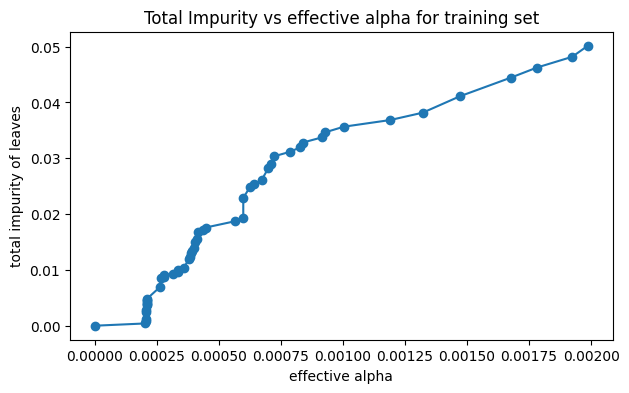

0) alpha = 0.0000 done.
1) alpha = 0.0002 done.
2) alpha = 0.0002 done.
3) alpha = 0.0002 done.
4) alpha = 0.0002 done.
5) alpha = 0.0002 done.
6) alpha = 0.0002 done.
7) alpha = 0.0002 done.
8) alpha = 0.0002 done.
9) alpha = 0.0002 done.
10) alpha = 0.0002 done.
11) alpha = 0.0002 done.
12) alpha = 0.0003 done.
13) alpha = 0.0003 done.
14) alpha = 0.0003 done.
15) alpha = 0.0003 done.
16) alpha = 0.0003 done.
17) alpha = 0.0003 done.
18) alpha = 0.0003 done.
19) alpha = 0.0004 done.
20) alpha = 0.0004 done.
21) alpha = 0.0004 done.
22) alpha = 0.0004 done.
23) alpha = 0.0004 done.
24) alpha = 0.0004 done.
25) alpha = 0.0004 done.
26) alpha = 0.0004 done.
27) alpha = 0.0004 done.
28) alpha = 0.0004 done.
29) alpha = 0.0004 done.
30) alpha = 0.0006 done.
31) alpha = 0.0006 done.
32) alpha = 0.0006 done.
33) alpha = 0.0006 done.
34) alpha = 0.0006 done.
35) alpha = 0.0007 done.
36) alpha = 0.0007 done.
37) alpha = 0.0007 done.
38) alpha = 0.0007 done.
39) alpha = 0.0008 done.
40) alpha 

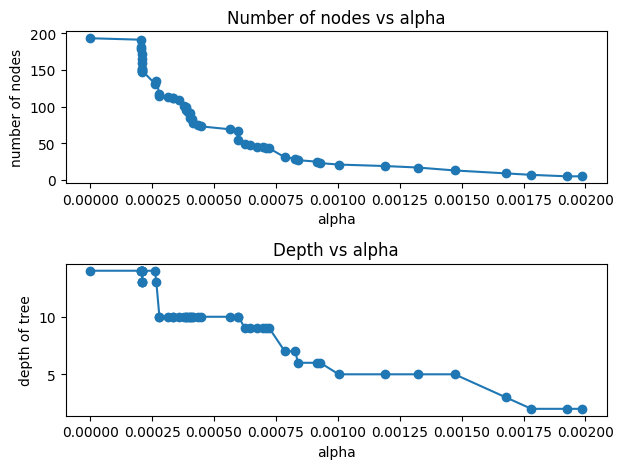

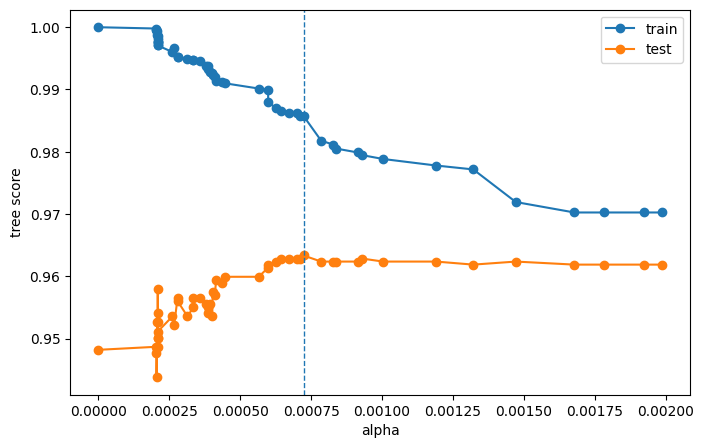

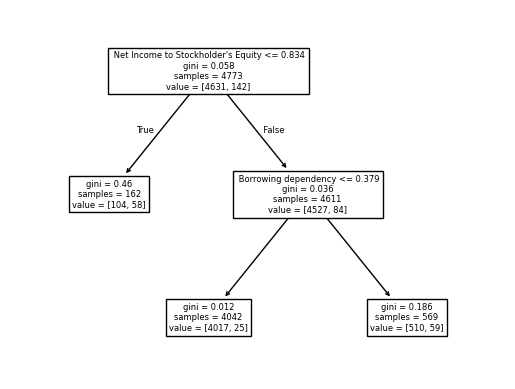

Accuracy of test data = 0.9633
Optimal alpha = 0.00072331


In [4]:
#we do cost complexity pruning to balance the trade off bw tree size and proper fit of training data

y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

#compute cost complexity pruning path
model = DecisionTreeClassifier()
path =  model.cost_complexity_pruning_path(x_train, y_train) #creates a seq of effective alpha (ccp_alpha) values, where each corresponds to a simpler pruned tree
ccp_alpha = path.ccp_alphas[:-1] #we exclude last alpha cos its basically a fully pruned tree no one wants that
impurity = path.impurities[:-1] #measures total impurity of tree's leaves for each alpha. impurity increases as tree is pruned.

#as alpha increases, we get simpler trees and increased impurity (misclassification error)
plt.figure(figsize=(7,4))
plt.plot(ccp_alpha, impurity, marker='o')
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

#now for each alpha in the alpha-list, we create a tree
models = []
for i, alpha in enumerate(ccp_alpha):
    model = DecisionTreeClassifier(ccp_alpha=alpha)
    model.fit(x_train, y_train)
    models.append(model)
    print('%d) alpha = %.4f done.' % (i, alpha))

#as alpha incr, number and depth of nodes decrease
node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alpha, node_counts, marker="o")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alpha, depth, marker="o")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


# Among the candidate trees, find the one with the lowest 
# misclassification rate on the test data. It's the same to find 
# the tree with the highest score.
# Calculate the score of the tree (model) with alpha applied.
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Find the alpha that creates the tree with the highest score on the test data. This is the optimal alpha, and the tree is optimal.
i_max = np.argmax(test_score)
opt_alpha = ccp_alpha[i_max]
opt_model = models[i_max]

# Observe the change in score for the change in alpha.
plt.figure(figsize=(8,5))
plt.plot(ccp_alpha, train_score, marker='o', label='train')
plt.plot(ccp_alpha, test_score, marker='o', label='test')
plt.axvline(x=opt_alpha, ls='--', lw=1.0)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('tree score')
plt.show()

feature_names = x.columns.tolist()
tree.plot_tree(model, feature_names=feature_names) #draws out decision tree structure with splitting criteria(how model splits data at each node), leaf nodes(fiinal predictions), feature importance (features used in decision-making)
plt.show()

# Evaluate the performance of the final tree.
print('Accuracy of test data = %.4f' % opt_model.score(x_test, y_test))
print('Optimal alpha = %.8f' % opt_alpha)